In [238]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import imageio
import zlib
import os
import seaborn as sns
from skimage.transform import resize
%matplotlib inline

In [2]:
with open('frame_data(21-0).pkl', 'rb') as input:
    data = pickle.load(input)

In [3]:
#idx, q_val, action, reward, done, lives, rgb_frame
data[0]

(0, 0.617294192314148, 5, 0.0, False, 0, array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [144,  72,  17],
         [144,  72,  17],
         [144,  72,  17]],
 
        [[144,  72,  17],
         [144,  72,  17],
         [144,  72,  17],
         ...,
         [144,  72,  17],
         [144,  72,  17],
         [144,  72,  17]],
 
        [[144,  72,  17],
         [144,  72,  17],
         [144,  72,  17],
         ...,
         [144,  72,  17],
         [144,  72,  17],
         [144,  72,  17]],
 
        ...,
 
        [[236, 236, 236],
         [236, 236, 236],
         [236, 236, 236],
         ...,
         [236, 236, 236],
         [236, 236, 236],
         [236, 236, 236]],
 
        [[236, 236, 236],
         [236, 236, 236],
         [236, 236, 236],
         ...,
         [236, 236, 236],
         [236, 236, 236],
         [236, 236, 236]],
 
        [[236, 236, 236],
         [236, 236, 236],
         [236, 236, 236],
  

In [ ]:
plt.imshow(data[0][6])

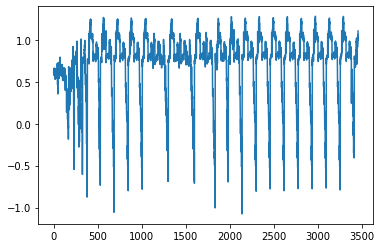

In [5]:
q_vals = np.array([x[1] for x in data])
plt.plot(q_vals)

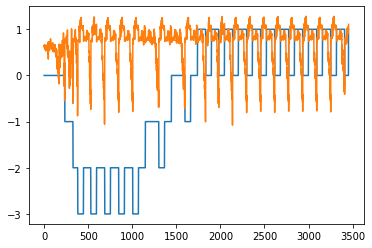

In [6]:
rewards = [x[3] for x in data]
cum_reward = np.cumsum(np.array(rewards))
#plt.figsize = (14, 7)
plt.plot(cum_reward)
plt.plot(q_vals)
plt.show()

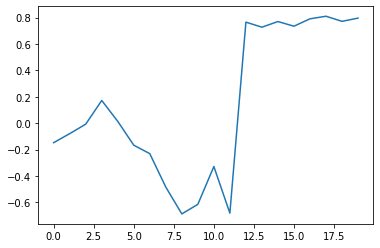

In [18]:
plt.plot(q_vals[1290:1310])

In [19]:
q_vals[1290:1310]

array([-0.1479191 , -0.07952112, -0.00781047,  0.17186409,  0.01370697,
       -0.16696829, -0.23135483, -0.4845421 , -0.68793136, -0.61525476,
       -0.32877827, -0.68208086,  0.76557803,  0.72730982,  0.77008063,
        0.73481166,  0.79082012,  0.81030869,  0.7717241 ,  0.79614997])

In [ ]:
# for i in range(1290, 1310):
#     plt.imshow(data[i][6])
#     plt.title = q_vals[i]
#     plt.show()
# for i in range(1297, 1304):
#     print(f'{i} q_val={q_vals[i]} cum_reward={cum_reward[i]}')
#     plt.imshow(data[i][6])
#     plt.show()


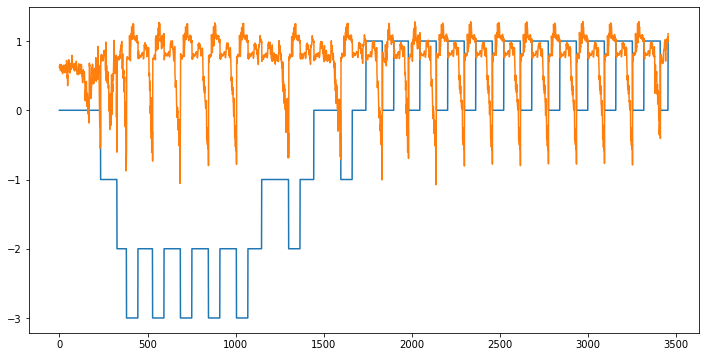

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(cum_reward)
plt.plot(q_vals)
plt.show()

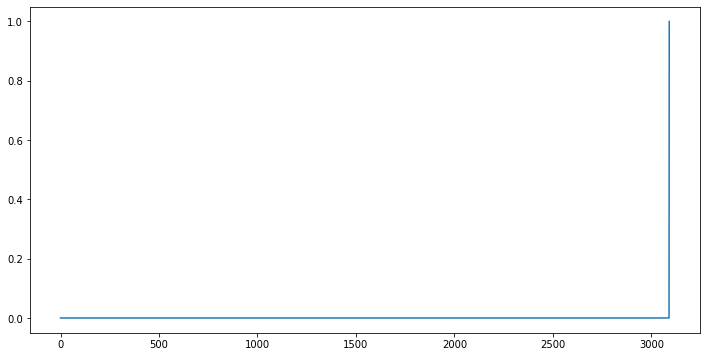

In [112]:
plt.figure(figsize=(12, 6))
plt.plot([x[4] for x in data])
plt.show()

NameError: name 'data' is not defined

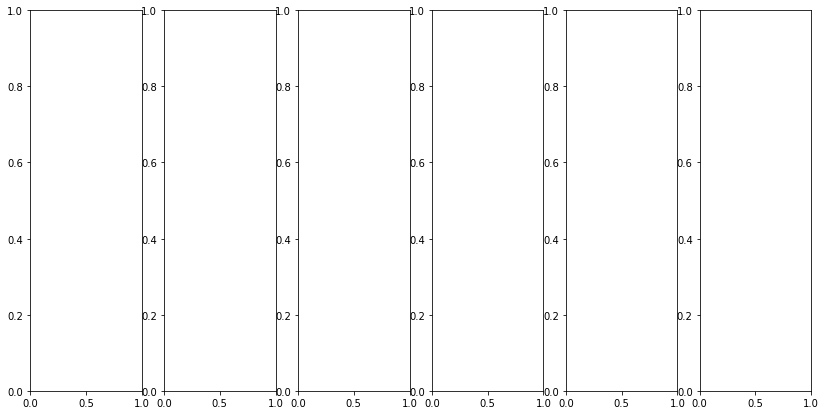

In [63]:

#fig, axs = plt.subplots(1, 5)
num_frames = 6
start_idx = 1297
fig = plt.figure(figsize=(14, 7))
axs = fig.subplots(1, num_frames)
#fig.figure.figsize = (16, 7)
#print(dir(fig))
for i in range(num_frames):
    idx = start_idx + i
    axs[i].imshow(data[idx][6])
    axs[i].set_title(f'frame {idx}\nmax_q={q_vals[idx]:.2f}\nr={cum_reward[idx]}')
    axs[i].xaxis.set_visible(False)
    axs[i].yaxis.set_visible(False)






In [59]:
with open('frame_data(21-18).pkl', 'rb') as input:
    data = pickle.load(input)

(84, 84, 1)


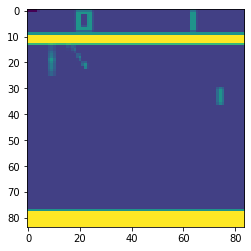

In [67]:
#print(data[0][7].shape)
tmp = data[104][7]
tmp2 = tmp @ np.array([0.25, 0.5, 0.75, 1.0]).reshape(4, 1)
print(tmp2.shape)
plt.imshow(tmp2.reshape(84, 84))


In [88]:

# weights = np.array([0.25, 0.5, 0.75, 1.0]).reshape(4, 1)
tmp = np.array([d[7] for d in data]) @ weights
tmp = tmp.reshape(-1, 84, 84)
# tmp = tmp.astype(dtype=np.uint8)

#tmp = np.array([d[7] for d in data]).mean(axis=3)
#tmp = tmp.astype(dtype=np.uint8)
print(tmp.shape)
print(tmp.max(), tmp.min())
tmp = (tmp - tmp.min() * 255/(tmp.max() - tmp.min())).astype(np.uint8)

(3092, 84, 84)
590.0 130.0


In [192]:
tmp = [(len(d[7].flatten()), len(zlib.compress(d[7].flatten()))) for d in data[1100:1200]]

In [188]:
data[0][7].flatten()

array([ 52,  52,  52, ..., 236, 236, 236], dtype=uint8)

In [194]:
sum([t[0] for t in tmp])/sum([t[1] for t in tmp])

67.75819849234168

In [89]:
imageio.mimsave('test_gif.gif', tmp, fps=60)
#


In [234]:
tmp = imageio.mimread(r"C:\CloudStation\sync\rl project\analysis\Pong what the computer sees (84x84).gif")

In [244]:
print(len(tmp))
print(tmp[0].shape)
#plt.imshow(tmp[100])
#print(resize(tmp[0], (420, 420)))
#tmp2= [resize(x, (420, 420)) for x in tmp]
imageio.mimsave('test_gif.gif', tmp2, fps=60)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


3092
(84, 84)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

![ChessUrl](test_gif.gif "sdklfjlskdjf")

<img src="test_gif.gif" width="420" align="center">

In [93]:
imageio.help()



TIFF - TIFF format [.tif, .tiff, .stk, .lsm]
BMP-PIL - Windows Bitmap [.bmp]
BUFR-PIL - BUFR [.bufr]
CUR-PIL - Windows Cursor [.cur]
DCX-PIL - Intel DCX [.dcx]
DDS-PIL - DirectDraw Surface [.dds]
DIB-PIL - Windows Bitmap []
EPS-PIL - Encapsulated Postscript [.ps, .eps]
FITS-PIL - FITS [.fit, .fits]
FLI-PIL - Autodesk FLI/FLC Animation [.fli, .flc]
FPX-PIL - FlashPix [.fpx]
FTEX-PIL - Texture File Format (IW2:EOC) [.ftc, .ftu]
GBR-PIL - GIMP brush file [.gbr]
GIF-PIL - Static and animated gif (Pillow) [.gif]
GRIB-PIL - GRIB [.grib]
HDF5-PIL - HDF5 [.h5, .hdf]
ICNS-PIL - Mac OS icns resource [.icns]
ICO-PIL - Windows Icon [.ico]
IM-PIL - IFUNC Image Memory [.im]
IMT-PIL - IM Tools []
IPTC-PIL - IPTC/NAA [.iim]
JPEG-PIL - JPEG (ISO 10918) [.jfif, .jpe, .jpg, .jpeg]
JPEG2000-PIL - JPEG 2000 (ISO 15444) [.jp2, .j2k, .jpc, .jpf, .jpx, .j2c]
MCIDAS-PIL - McIdas area file []
MIC-PIL - Microsoft Image Composer [.mic]
MPO-PIL - MPO (CIPA DC-007) [.mpo]
MSP-PIL - Windows Paint [.msp]
PCD-PIL - Ko

In [110]:
print(data[100][7].shape)
print(data[101][7].shape)
print(data[100][7].sum(axis=(0,1)))
print(data[101][7].sum(axis=(0,1)))
#print([x.sum(axis=1) for x in data[100][7]])

(84, 84, 4)
(84, 84, 4)
[749533 749530 749564 749562]
[749530 749564 749562 749388]


In [97]:
len(data[100][7])

84

In [114]:
!dir logs

 Volume in drive C is OS
 Volume Serial Number is B03A-72E9

 Directory of C:\CloudStation\sync\education\MSc Data Science\H Drive backup\CM50270 RL\project\logs

20/04/2020  16:47    <DIR>          .
20/04/2020  16:47    <DIR>          ..
20/04/2020  16:45           168,219 results_20200417_0932.log
               1 File(s)        168,219 bytes
               2 Dir(s)  23,396,159,488 bytes free


In [ ]:
f = open('logs\\results_20200417_0932.log')
tmp = f.readlines()
print([(i, x) for i,x in enumerate(tmp)])


In [126]:
# import io
# f = io.BytesIO()
# print(data[7])
s = pickle.dumps(data)
import zlib
print("raw:", len(s))
print("z:", len(zlib.compress(s)))
# print(str(s))

raw: 399485889
z: 2855431


In [125]:
[type(x) for x in data[0]]

[int, float, int, numpy.float64, bool, int, numpy.ndarray, numpy.ndarray]

In [127]:
print(len(pickle.dumps(tmp)))

185384


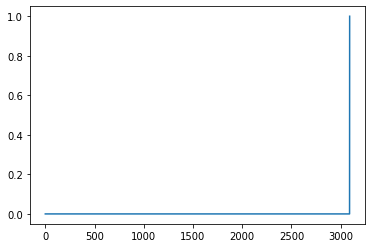

In [136]:
plt.plot([x[4] for x in data])

(0, 0.6506515145301819, 5, 0.0, False, 0, array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [144,  72,  17],
         [144,  72,  17],
         [144,  72,  17]],
 
        [[144,  72,  17],
         [144,  72,  17],
         [144,  72,  17],
         ...,
         [144,  72,  17],
         [144,  72,  17],
         [144,  72,  17]],
 
        [[144,  72,  17],
         [144,  72,  17],
         [144,  72,  17],
         ...,
         [144,  72,  17],
         [144,  72,  17],
         [144,  72,  17]],
 
        ...,
 
        [[236, 236, 236],
         [236, 236, 236],
         [236, 236, 236],
         ...,
         [236, 236, 236],
         [236, 236, 236],
         [236, 236, 236]],
 
        [[236, 236, 236],
         [236, 236, 236],
         [236, 236, 236],
         ...,
         [236, 236, 236],
         [236, 236, 236],
         [236, 236, 236]],
 
        [[236, 236, 236],
         [236, 236, 236],
         [236, 236, 236],
 

In [150]:
folder = r'C:\CloudStation\sync\rl project\remote\ddqn\DDQN_PongNoFrameskip-v4_20200428_0942\''
fsp = r'C:\CloudStation\sync\rl project\remote\ddqn\DDQN_PongNoFrameskip-v4_20200428_0942\single_game_data_600.zpkl'

#with open(os.path.join(folder, 'single_game_data_600.zpkl'), 'rb') as f:
with open(fsp, 'rb') as f:
    game_data = f.read()
    game_data = pickle.loads(zlib.decompress(game_data))

In [151]:
game_data[0]

(0, 2.3956549167633057, 5, 0, array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [144,  72,  17],
         [144,  72,  17],
         [144,  72,  17]],
 
        [[144,  72,  17],
         [144,  72,  17],
         [144,  72,  17],
         ...,
         [144,  72,  17],
         [144,  72,  17],
         [144,  72,  17]],
 
        [[144,  72,  17],
         [144,  72,  17],
         [144,  72,  17],
         ...,
         [144,  72,  17],
         [144,  72,  17],
         [144,  72,  17]],
 
        ...,
 
        [[236, 236, 236],
         [236, 236, 236],
         [236, 236, 236],
         ...,
         [236, 236, 236],
         [236, 236, 236],
         [236, 236, 236]],
 
        [[236, 236, 236],
         [236, 236, 236],
         [236, 236, 236],
         ...,
         [236, 236, 236],
         [236, 236, 236],
         [236, 236, 236]],
 
        [[236, 236, 236],
         [236, 236, 236],
         [236, 236, 236],
         ...,

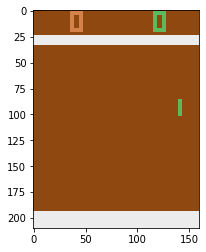

In [155]:
plt.imshow(game_data[0][4])

10.0 -20.0


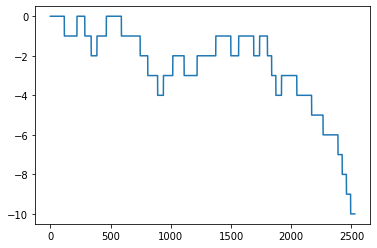

In [165]:
rewards = np.array([x[3] for x in game_data]) 
print(rewards[rewards>0].sum(), rewards[rewards<0].sum())
plt.plot(np.cumsum(rewards))

In [161]:
len(game_data)

2529

In [2]:
fsp = r"C:\CloudStation\sync\rl project\remote\ddqn_breakout(new)\records.pkl"
#fsp = r'C:\CloudStation\sync\rl project\remote\ddqn_pacman\records.pkl'
pacman_data = pickle.load(open(fsp, 'rb'))

In [3]:
# (t, games, frames, epsilon, score, network_loss, delta_t, frames_per_sec)
scores = [x[4] for x in pacman_data]
window_size = 100
scores_mean = [np.mean(scores[i-window_size:i]) for i in range(window_size, len(scores))]
scores_high = [np.max(scores[i-window_size:i]) for i in range(window_size, len(scores))]
scores_low = [np.min(scores[i-window_size:i]) for i in range(window_size, len(scores))]
epsilon_vals = np.array([x[3] for x in pacman_data])
network_loss = np.array([x[5] for x in pacman_data])
game_idx = [x[1] for x in pacman_data][window_size:]

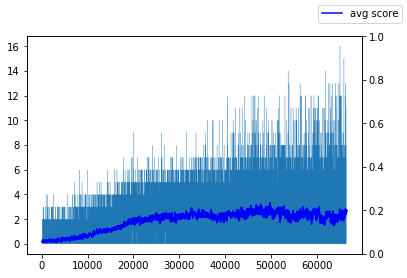

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(game_idx, scores_mean, 'b-', label='avg score')
#ax1.plot(game_idx, scores, 'b-', alpha=0.15, label='scores')
ax1.fill_between(game_idx, scores_high, scores_low)
#ax2.plot(np.log(network_loss), 'g-', label='network loss')
#ax2.plot(epsilon_vals, 'g-', label='epsilon')
fig.legend()
plt.show()

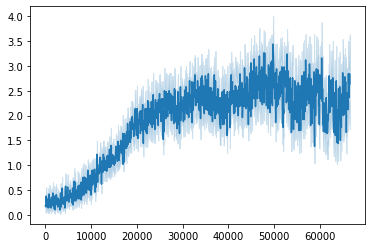

In [16]:
window_size = 50
game_idx = window_size * (np.array([x[1] for x in pacman_data]) // window_size)
sns.lineplot(game_idx, y=scores)

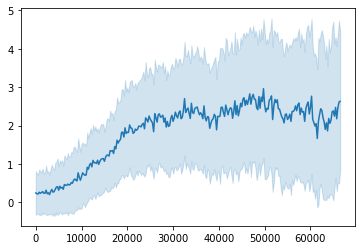

In [15]:
window_size = 250
game_idx = window_size * (np.array([x[1] for x in pacman_data]) // window_size)
sns.lineplot(game_idx, y=scores, ci='sd')

In [177]:
fsp = r"C:\CloudStation\sync\rl project\remote\ddqn_breakout(new)\records.pkl"
breakout_data = pickle.load(open(fsp, 'rb'))


UnpicklingError: invalid load key, '\x00'.

In [6]:
game_idx.shape

(66510,)

In [225]:
def get_records_from_log(file_name):
    with open(file_name, 'r') as f:
        lines = iter(f.readlines())
        while not next(lines).startswith("games,frames"):
            pass
        lines2 = [x.split(',') for x in lines]
        
    # times,games,frames,epsilon,score,network_loss,delta_t,frames/t
    d = dict()
#     print(lines2[0:10])
    d['num_games'] = len(lines2)
    d['scores'] = [float(x[4]) for x in lines2]
    d['frames'] = [int(x[1]) for x in lines2]
    d['times'] = [x[0] for x in lines2]
    d['epsilon'] = [float(x[3]) for x in lines2]
    d['net_loss'] = [float(x[5]) for x in lines2]
    
    return d

tmp = get_records_from_log(r"X:\rl_project_data\Breakout_DUEL\log.txt")


In [3]:
# function to load in summary data (data by game for one of the runs)
# loads in the records.pkl file
def get_records(file_name):
    with open(file_name, 'rb') as f:
        recs = pickle.load(f)
    # times,games,frames,epsilon,score,network_loss,delta_t,frames/t
    d = dict()
    d['num_games'] = len(recs)
    d['scores'] = [x[4] for x in recs]
    d['frames'] = [x[1] for x in recs]
    d['times'] = [x[0] for x in recs]
    d['epsilon'] = [x[3] for x in recs]
    d['net_loss'] = [x[5] for x in recs]
    
    return d

recs = get_records(r"X:\rl_project_data\Pong_DDQN(old)\records.pkl")
#print(recs)

In [330]:
pong_odqn_recs = get_records(r"X:\rl_project_data\Pong_DDQN(old)\records.pkl")
pong_ddqn_recs = get_records(r"X:\rl_project_data\Pong_DDQN\records.pkl")
pong_duel_recs = get_records(r"X:\rl_project_data\Pong_DUEL\records.pkl")
pong_prio_recs = get_records(r"X:\rl_project_data\PRPLY_PongNoFrameskip-v4_20200428_0943\records.pkl")

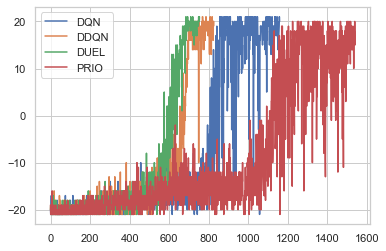

In [332]:
s1 = np.array(pong_odqn_recs['scores'])
s2 = np.array(pong_ddqn_recs['scores'])
s3 = np.array(pong_duel_recs['scores'])
s4 = np.array(pong_prio_recs['scores'])

plt.plot(s1, label='DQN')
plt.plot(s2, label='DDQN')
plt.plot(s3, label='DUEL')
plt.plot(s4, label='PRIO')
plt.legend()
# plt.show()
plt.savefig('test.png')#, transparent=False)

In [43]:
tmp = np.full_like(s1, 21)
tmp[0:s2.size] = s2
s2 = tmp

tmp = np.full_like(s1, 21)
tmp[0:s3.size] = s3
s3 = tmp



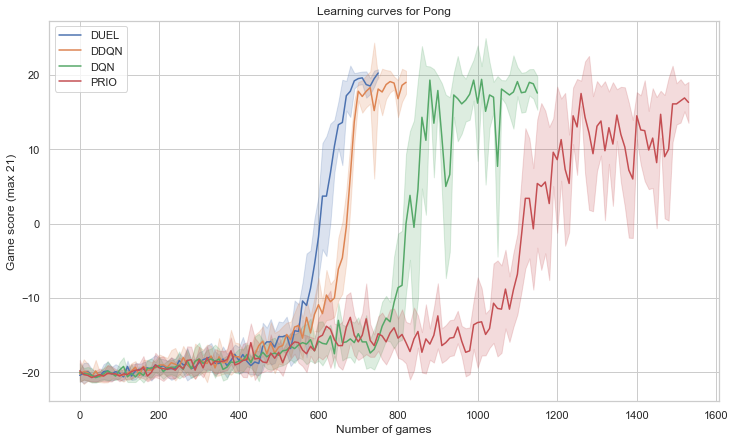

In [334]:
window_size = 10
def get_x_vals(window_size, arr_to_copy_from):
    length = arr_to_copy_from.shape[0]
    return window_size * (np.arange(length) // window_size)

sns.set(style="whitegrid")

fig = plt.figure(figsize=(12, 7))
sns.lineplot(x=get_x_vals(window_size, s3), y=s3, ci='sd', label='DUEL')
sns.lineplot(x=get_x_vals(window_size, s2), y=s2, ci='sd', label='DDQN')
sns.lineplot(x=get_x_vals(window_size, s1), y=s1, ci='sd', label='DQN')
sns.lineplot(x=get_x_vals(window_size, s4), y=s4, ci='sd', label='PRIO')
plt.gca().set_title('Learning curves for Pong')
plt.gca().set_xlabel('Number of games')
plt.gca().set_ylabel('Game score (max 21)')
plt.legend(loc='upper left')
plt.savefig('Pong Learning Curves.png')
plt.show()



In [226]:
brk_ddqn_recs = get_records(r"X:\rl_project_data\Breakout_DDQN\DDQN_BreakoutNoFrameskip-v4_20200429_2246\records.pkl")
brk_duel_recs = get_records_from_log(r"X:\rl_project_data\Breakout_DUEL\log.txt")

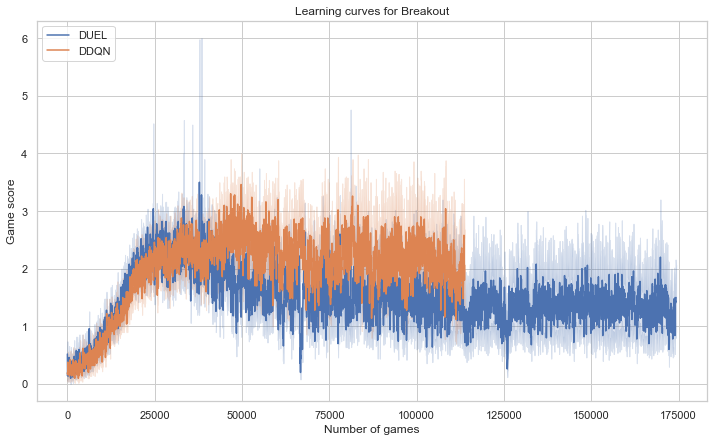

In [327]:
s2 = np.array(brk_ddqn_recs['scores'])
s3 = np.array(brk_duel_recs['scores'])

window_size = 50
fig = plt.figure(figsize=(12, 7))
sns.lineplot(x=get_x_vals(window_size, s3), y=s3, label='DUEL')# ci='sd')
sns.lineplot(x=get_x_vals(window_size, s2), y=s2, label='DDQN')# ci='sd')
# sns.lineplot(x=get_x_vals(window_size, s1), y=s1, ci='sd', label='DQN')
plt.gca().set_title('Learning curves for Breakout')
plt.gca().set_xlabel('Number of games')
plt.gca().set_ylabel('Game score')
plt.legend(loc='upper left')
plt.savefig('Breakout Learning Curves.png')
plt.show()

In [232]:
pac_ddqn_recs = get_records(r"X:\rl_project_data\Pacman_DDQN\records.pkl")
pac_duel_recs = get_records(r"X:\rl_project_data\Pacman_DUEL\records.pkl")

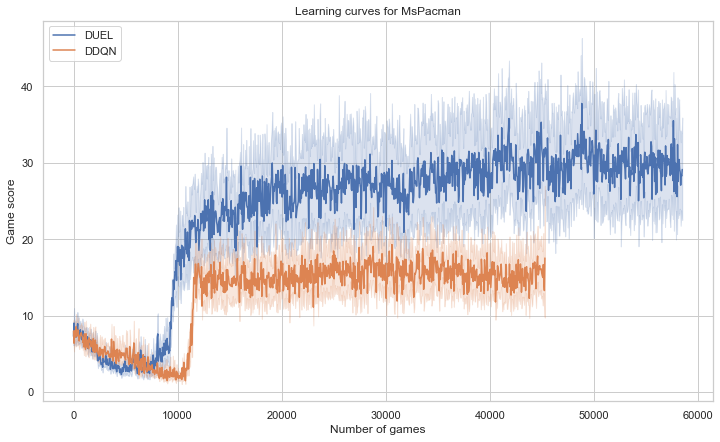

In [328]:
s2 = np.array(pac_ddqn_recs['scores'])
s3 = np.array(pac_duel_recs['scores'])

window_size = 50
fig = plt.figure(figsize=(12, 7))
sns.lineplot(x=get_x_vals(window_size, s3), y=s3, label='DUEL') #, ci='sd')
sns.lineplot(x=get_x_vals(window_size, s2), y=s2, label='DDQN') #, ci='sd')
# sns.lineplot(x=get_x_vals(window_size, s1), y=s1, ci='sd', label='DQN')
plt.gca().set_title('Learning curves for MsPacman')
plt.gca().set_xlabel('Number of games')
plt.gca().set_ylabel('Game score')
plt.legend(loc='upper left')
plt.savefig('Pacman Learning Curves.png')
plt.show()

(1159,)
(1159,)
(45315,)
(58530,)


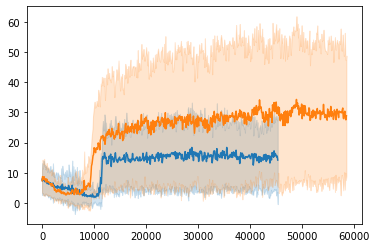

In [208]:
print(x_vals.shape)
print(s1.shape)
print(s2.shape)
print(s3.shape)
sns.lineplot(, s2, ci='sd')
sns.lineplot(np.around(np.arange(s3.shape[0]), -2), s3, ci='sd')
#sns.lineplot(np.around(np.arange(s2.shape[0]), -1), s2)
#sns.lineplot(x_vals[0:len(s2)], s2, ci='sd')

In [204]:
print(np.around(np.arange(0, 100), -1))

[  0   0   0   0   0   0  10  10  10  10  10  10  10  10  10  20  20  20
  20  20  20  20  20  20  20  20  30  30  30  30  30  30  30  30  30  40
  40  40  40  40  40  40  40  40  40  40  50  50  50  50  50  50  50  50
  50  60  60  60  60  60  60  60  60  60  60  60  70  70  70  70  70  70
  70  70  70  80  80  80  80  80  80  80  80  80  80  80  90  90  90  90
  90  90  90  90  90 100 100 100 100 100]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


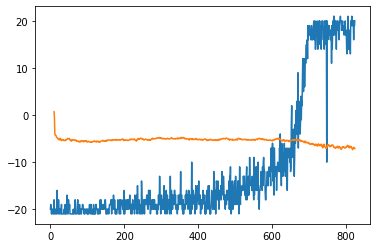

In [67]:
plt.plot(pong_ddqn_recs['scores'])
plt.plot(np.log(np.array(pong_ddqn_recs['net_loss'])))

In [18]:
print(len(pong_odqn_recs['scores']))
print(len(x_vals))


1159
1160


In [69]:
def get_single_game(file_name):
    with open(file_name, 'rb') as f:
        game_data = pickle.loads(zlib.decompress(f.read()))
    # list of tuples (frame_idx, max_q_val, action, reward, frame)
    frame_idxs = []
    max_q_vals = []
    actions = []
    rewards = []
    frames = []
    for x in game_data:
        frame_idxs.append(x[0])
        max_q_vals.append(x[1])
        actions.append(x[2])
        rewards.append(x[3])
        frames.append(x[4])
    
    return (np.array(frame_idxs), np.array(max_q_vals), np.array(actions),
            np.array(rewards), np.sum(rewards), np.array(frames))

# tmp = get_single_game(r"X:\rl_project_data\Pong_DDQN\single_game_data_800.zpkl")

In [288]:
pong_game = get_single_game(r"X:\rl_project_data\Pong_DDQN\single_game_data_800.zpkl")
break_game =  get_single_game(
    r"X:\rl_project_data\Breakout_DDQN\DDQN_BreakoutNoFrameskip-v4_20200429_2246\single_game_data_99000.zpkl")
pac_game = get_single_game(r"X:\rl_project_data\Pacman_DDQN\single_game_data_42600.zpkl")

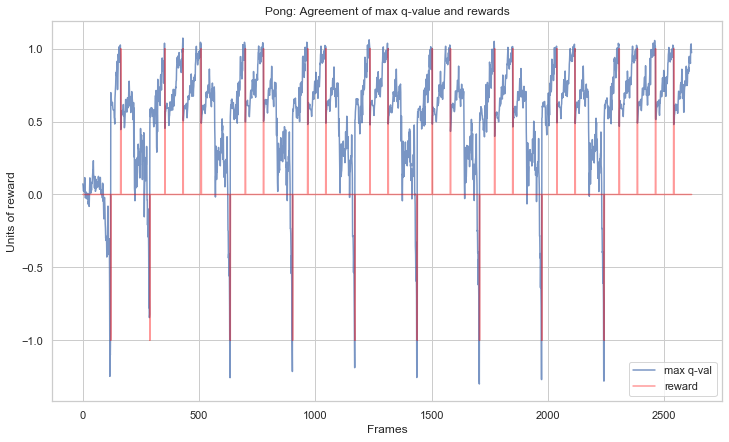

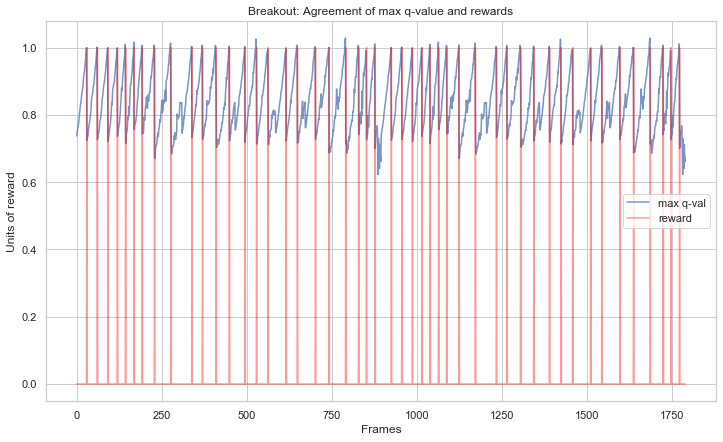

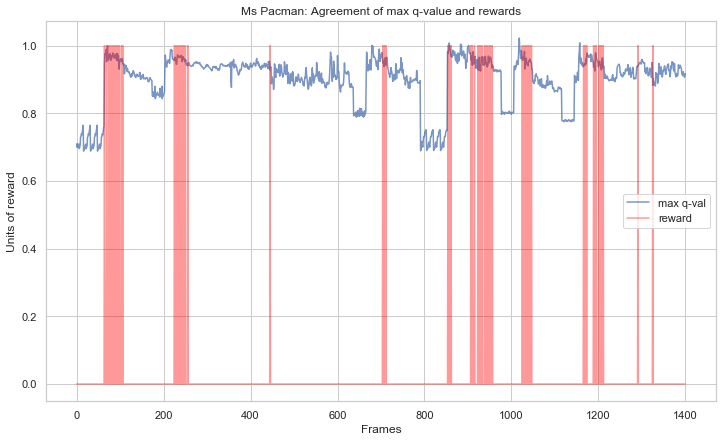

In [329]:

def plot_q_and_reward(game_states, game_name='Pong', save_name=None):
    plt.figure(figsize=(12,7))
    plt.plot(game_states[1], label='max q-val', alpha=0.75)
    plt.plot(game_states[3], label='reward', alpha=0.4, color='red')
    plt.gca().set_title(f'{game_name}: Agreement of max q-value and rewards')
    plt.gca().set_xlabel('Frames')
    plt.gca().set_ylabel('Units of reward')
    plt.legend()
    if not save_name is None:
        plt.savefig(save_name)
    plt.show()
    
plot_q_and_reward(pong_game, "Pong", "Pong Agreement of Q-Values and rewards")
plot_q_and_reward(break_game, 'Breakout', "Breakout Agreement of Q-Values and rewards")
plot_q_and_reward(pac_game, 'Ms Pacman', "Pacman Agreement of Q-Values and rewards")

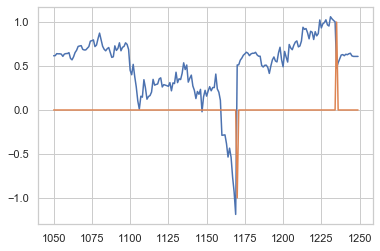

In [267]:
start_idx=1050
stop_idx=1250

plt.plot(pong_game[0][start_idx:stop_idx], pong_game[1][start_idx:stop_idx])
plt.plot(pong_game[0][start_idx:stop_idx], pong_game[3][start_idx:stop_idx])
#print(pong_game[0][start_idx:stop_idx], pong_game[3][start_idx:stop_idx])

[ 0.39585063  0.21255556  0.13577858  0.02355155 -0.24603295 -0.25057602
 -0.43586645 -0.40704784 -0.5576154  -0.42231151 -0.53810656 -0.77137035
 -1.21628332 -1.25626874  0.5303812   0.56487608  0.61313671  0.59051299
  0.62146735  0.64890414]


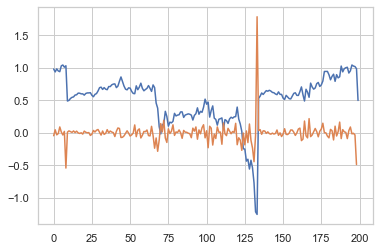

In [268]:
q_vals = pong_game[1][500:700]
q_deltas = np.diff(np.array(q_vals))
plt.plot(q_vals)
plt.plot(q_deltas)
print(q_vals[120:140])

In [337]:
def show_frames(game_state, start_idx, stop_idx, step_idx=1, save_name=None):
    frames = game_state[5][start_idx:stop_idx:step_idx]
    num_frames = len(frames)
    q_vals = game_state[1][start_idx:stop_idx:step_idx]
    rewards = game_state[3][start_idx:stop_idx:step_idx]
    
    fig = plt.figure(figsize=(num_frames * 3, 6))
    axs = fig.subplots(1, num_frames)
    for i in range(num_frames):
        idx = start_idx + i
        axs[i].imshow(frames[i])
        if not (q_vals is None) and not (rewards is None):
            axs[i].set_title(f'frame {i}\nmax_q={q_vals[i]:.2f}\nr={rewards[i]}')
        axs[i].xaxis.set_visible(False)
        axs[i].yaxis.set_visible(False)
    
    if save_name is not None:
        plt.savefig(save_name)

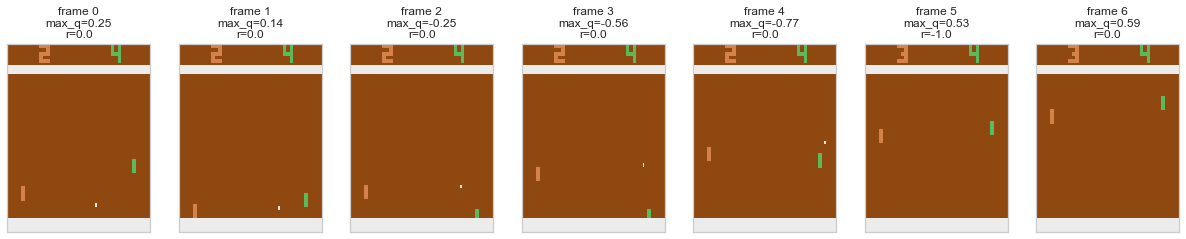

In [338]:
show_frames(pong_game, 619, 640, 3, 'Frames from Pong with learned Q and reward.png')


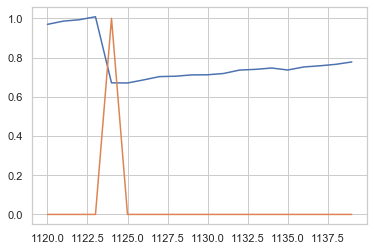

In [282]:
start_idx=1120
stop_idx=1140

plt.plot(break_game[0][start_idx:stop_idx], break_game[1][start_idx:stop_idx])
plt.plot(break_game[0][start_idx:stop_idx], break_game[3][start_idx:stop_idx])
#print(pong_game[0][start_idx:stop_idx], pong_game[3][start_idx:stop_idx])

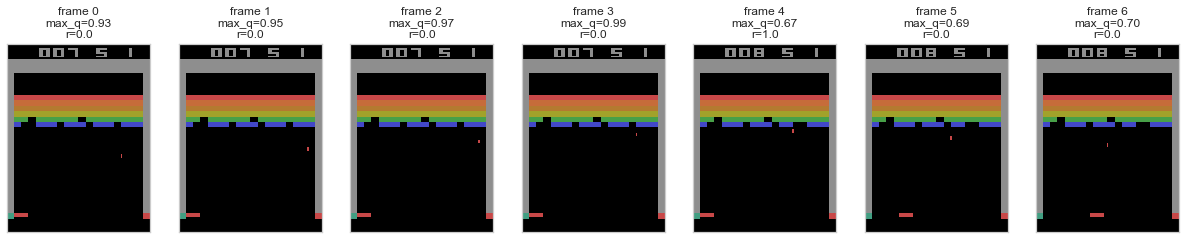

In [339]:
show_frames(break_game, 1116, 1129, 2, 'Frames from Breakout with learned Q and reward.png')


1401


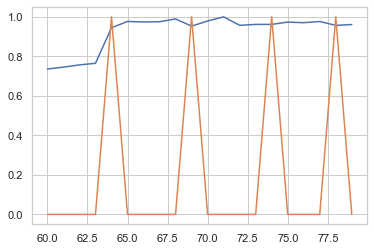

In [317]:
print(len(pac_game[0]))
start_idx=60
stop_idx=80

plt.plot(pac_game[0][start_idx:stop_idx], pac_game[1][start_idx:stop_idx])
plt.plot(pac_game[0][start_idx:stop_idx], pac_game[3][start_idx:stop_idx])
#print(pong_game[0][start_idx:stop_idx], pong_game[3][start_idx:stop_idx])

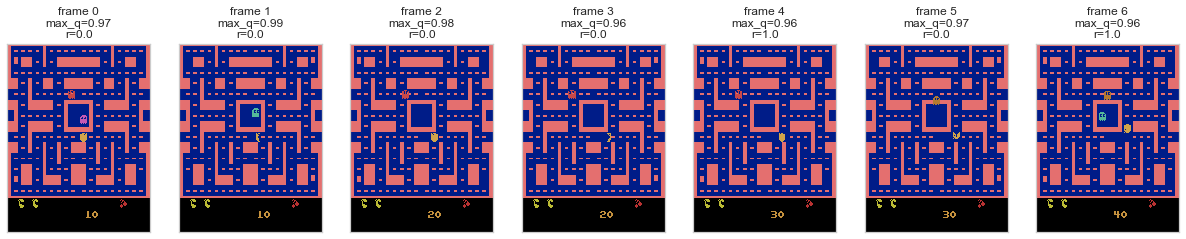

In [340]:
show_frames(pac_game, 66, 80, 2, 'Frames from Pacman with learned Q and reward.png')

In [ ]:
print()